# Libraries

In [1]:
import sys
sys.path.append('../')
from src.utils.utilities import *

#### Data exploration and visualization

In [2]:
import os
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tqdm import tqdm as tqdm

#### Raster manipulation

In [3]:
import rasterio as rio
from rasterio import warp, mask, features
from rasterio.windows import Window
from rasterio.plot import show, reshape_as_image, adjust_band, reshape_as_raster

#### Manipulate polygons.

In [4]:
from pyproj import Proj, Transformer, transform
from shapely.geometry import Polygon

#### Geospatial data processing

In [5]:
from glob import glob
from osgeo import gdal, ogr, osr

# Raster exploration

#### Label paths and rasters

In [6]:
label_path = '../data/images/processed/labels/landsat/landcover_ecuador_v1.tif'
raster_path = '../data/images/processed/products/L8/LC08_L1TP_010063_20141030_20200910_02.tif'

#### Label image processing

In [7]:
dataset_labels = open_raster(label_path)

Numero de bandas en la imagen: 1

Tamaño de la imagen es: 25540 filas x 34000 columnas

Raster driver: GTiff

Proyeccion de Imagen:
PROJCS["WGS 84 / UTM zone 17S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


ERROR 1: PROJ: internal_proj_identify: /home/thend/miniconda3/envs/soil-env/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [8]:
windows = Window(col_off=30000, row_off=30000, width=30000, height=30000)
labels_image = read_raster(dataset_labels)

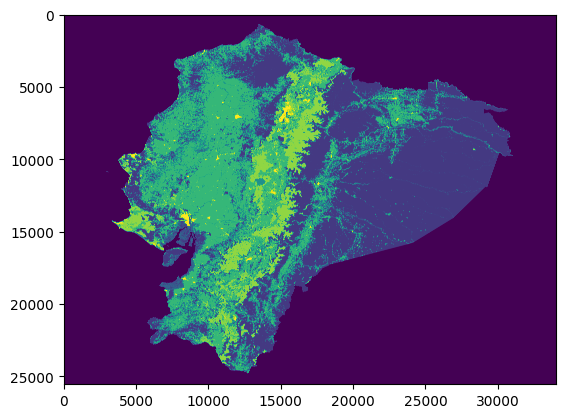

<Axes: >

In [9]:
show(labels_image)

##### Number of samples per class

In [10]:
data_list = samples_by_class(labels_image, class_names_l8)
data_list

[('Sin Clasificar', 511054838),
 ('Bosque', 181339750),
 ('Cuerpo de Agua', 7058888),
 ('Otras Tierras', 1558991),
 ('Tierra Agropecuaria', 129146919),
 ('Vegetacion Arbustiva y Herbacea', 34098007),
 ('Zona Antropica', 4102607)]

In [11]:
percentage_by_class(labels_image, class_names_l8)

Bosque:  0.51
Cuerpo de Agua:  0.02
Otras Tierras:  0.00
Tierra Agropecuaria:  0.36
Vegetacion Arbustiva y Herbacea:  0.10
Zona Antropica:  0.01


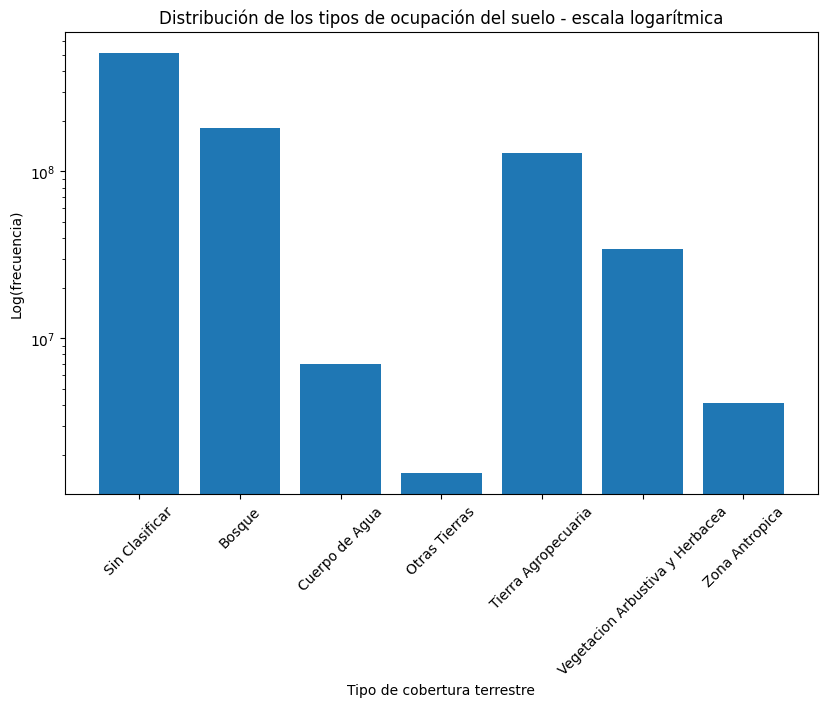

In [12]:
distribution_of_land(data_list)

#### Combined label image

In [13]:
labels_merge = merge_classes(labels_image, reclassification_l8)

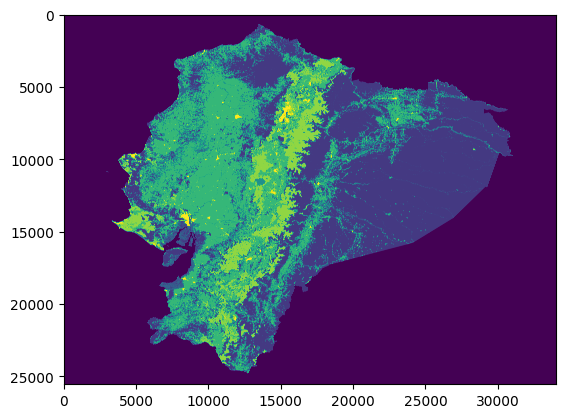

<Axes: >

In [14]:
show(labels_merge)

##### Number of samples per class mixed

In [15]:
data_list = samples_by_class(labels_merge, class_names_l8)
data_list

[('Sin Clasificar', 511054838),
 ('Bosque', 181339750),
 ('Cuerpo de Agua', 7058888),
 ('Otras Tierras', 1558991),
 ('Tierra Agropecuaria', 129146919),
 ('Vegetacion Arbustiva y Herbacea', 34098007),
 ('Zona Antropica', 4102607)]

In [16]:
percentage_by_class(labels_merge, class_names_l8)

Bosque:  0.51
Cuerpo de Agua:  0.02
Otras Tierras:  0.00
Tierra Agropecuaria:  0.36
Vegetacion Arbustiva y Herbacea:  0.10
Zona Antropica:  0.01


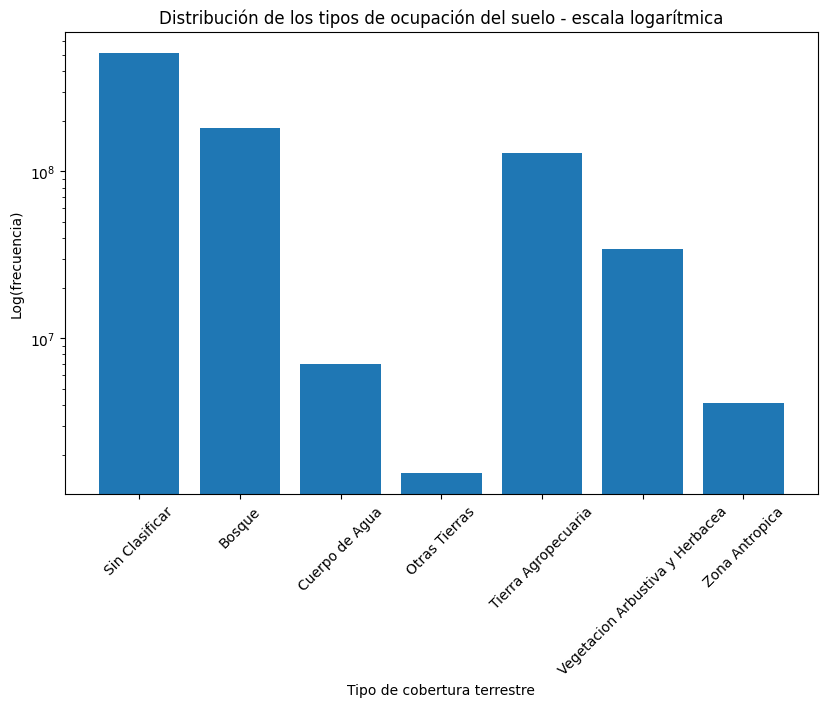

In [17]:
distribution_of_land(data_list)

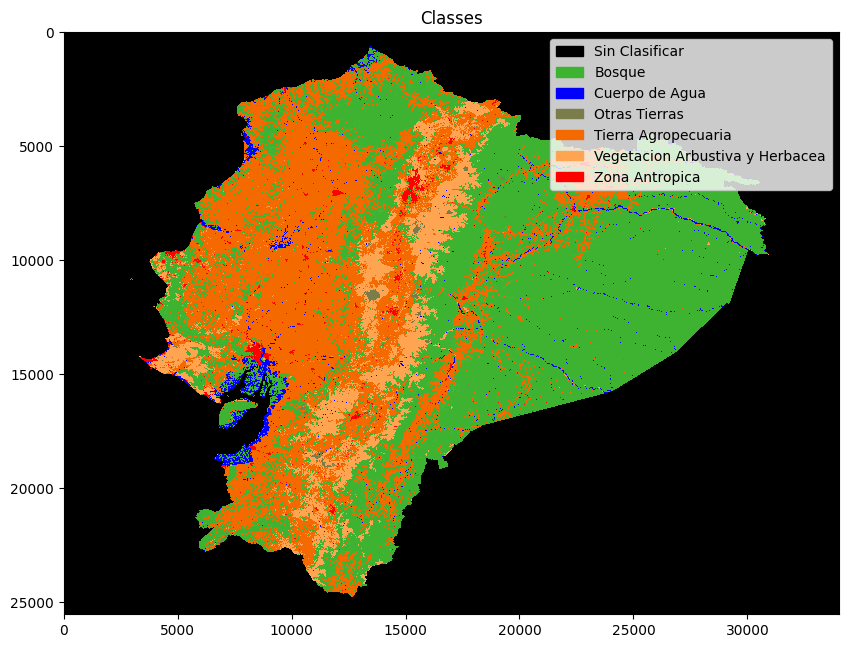

In [18]:
plot_merge_class(labels_merge, colors_l8, class_names_l8)